Hypothesis 4: "Wage growth in the manufacturing sector (AHEMAN) is positively correlated with the overall wage growth across all sectors (AWHAE)."
Rationale: Manufacturing is a significant part of the economy, and wage trends in this sector may reflect or influence broader wage trends.

In [ ]:
import pandas_datareader.data as web
from datetime import datetime

# Set the date range
start = datetime(1939, 1, 1)
end = datetime(2024, 1, 1)

# Fetch AHEMAN data from FRED
aheman_data = web.DataReader('AHEMAN', 'fred', start, end)

# Display the first few rows to verify
print(aheman_data.head())

            AHEMAN
DATE              
1939-01-01    0.49
1939-02-01    0.49
1939-03-01    0.49
1939-04-01    0.49
1939-05-01    0.49


In [ ]:
# Fetch AWHAE data from FRED
awhae_data = web.DataReader('AWHAE', 'fred', start, end)

# Display the first few rows to verify
print(awhae_data.head())

            AWHAE
DATE             
2006-03-01   98.0
2006-04-01   98.4
2006-05-01   98.4
2006-06-01   98.8
2006-07-01   98.6


In [ ]:
import pandas as pd

# Merge the AHEMAN and AWHAE data on the date column
merged_data = pd.merge(aheman_data, awhae_data, left_index=True, right_index=True, suffixes=('_AHEMAN', '_AWHAE'))

# Display the merged data
print(merged_data.head())

            AHEMAN  AWHAE
DATE                     
2006-03-01   16.69   98.0
2006-04-01   16.74   98.4
2006-05-01   16.74   98.4
2006-06-01   16.76   98.8
2006-07-01   16.70   98.6


**DUAL-AXIS LINE GRAPH:**

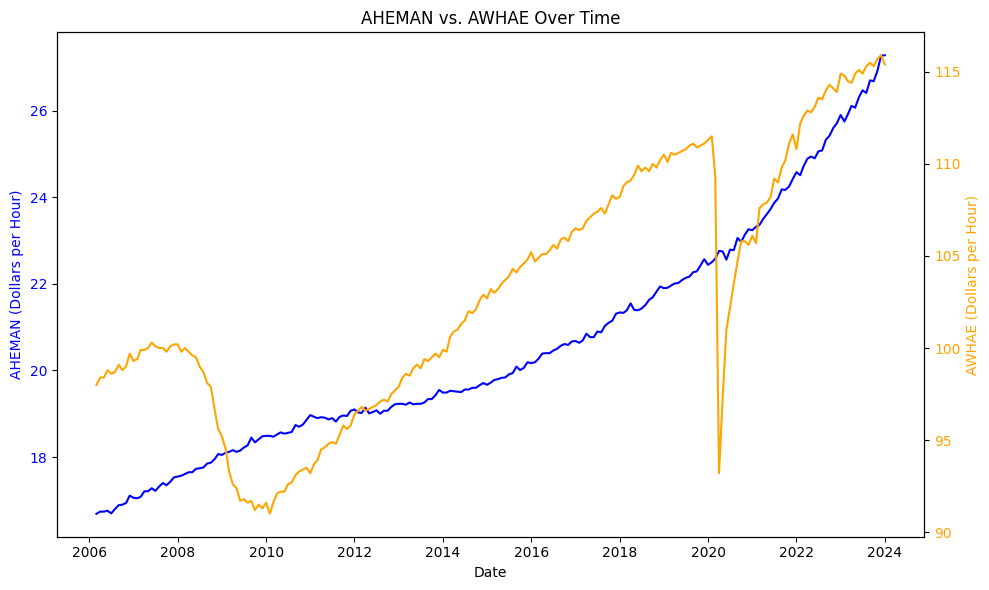

In [ ]:
import matplotlib.pyplot as plt

# Plot the dual-axis line graph
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot AHEMAN on the first axis
ax1.plot(merged_data.index, merged_data['AHEMAN'], color='blue', label='AHEMAN')
ax1.set_xlabel('Date')
ax1.set_ylabel('AHEMAN (Dollars per Hour)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for AWHAE
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['AWHAE'], color='orange', label='AWHAE')
ax2.set_ylabel('AWHAE (Dollars per Hour)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Set the title and show the plot
plt.title('AHEMAN vs. AWHAE Over Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**CORRELATION ANALYSIS:**

In [ ]:
# Calculate the Pearson correlation coefficient
correlation = merged_data['AHEMAN'].corr(merged_data['AWHAE'])
print(f'Pearson Correlation Coefficient: {correlation}')

Pearson Correlation Coefficient: 0.8404977633527178


In [ ]:
import statsmodels.api as sm

# Define the independent variable (AHEMAN) and dependent variable (AWHAE)
X = merged_data['AHEMAN']
y = merged_data['AWHAE']

# Add a constant to the independent variable (required for OLS regression)
X = sm.add_constant(X)

# Perform the OLS regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  AWHAE   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     512.6
Date:                Mon, 09 Sep 2024   Prob (F-statistic):           1.32e-58
Time:                        23:49:07   Log-Likelihood:                -588.34
No. Observations:                 215   AIC:                             1181.
Df Residuals:                     213   BIC:                             1187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.0007      2.004     28.945      0.0

The OLS regression results indicate a strong relationship between AHEMAN (Average Hourly Earnings in Manufacturing) and AWHAE (Average Hourly Earnings across All Sectors), with an R-squared value of 0.706. This suggests that 70.6% of the variability in AWHAE can be explained by changes in AHEMAN.

Here are some key takeaways from the regression analysis:

Coefficient for AHEMAN: The coefficient for AHEMAN is 2.19, meaning that for each dollar increase in Average Hourly Earnings in Manufacturing, the overall wage across all sectors (AWHAE) is expected to increase by approximately 2.19 units.

P-value for AHEMAN: The p-value is 0.000, which is statistically significant, indicating that the relationship between AHEMAN and AWHAE is not due to random chance.

Intercept (constant): The constant term (58.00) suggests that when AHEMAN is zero, the AWHAE would be around 58.00. While this is more of a theoretical value, it helps ground the regression line.

R-squared: The relatively high R-squared value confirms that there is a strong linear relationship between the two variables.

These results support Hypothesis 4: "Wage growth in the manufacturing sector (AHEMAN) is positively correlated with overall wage growth across all sectors (AWHAE)." The data shows that as wages in manufacturing increase, wages across all sectors also tend to rise.



**DASHBOARD:**

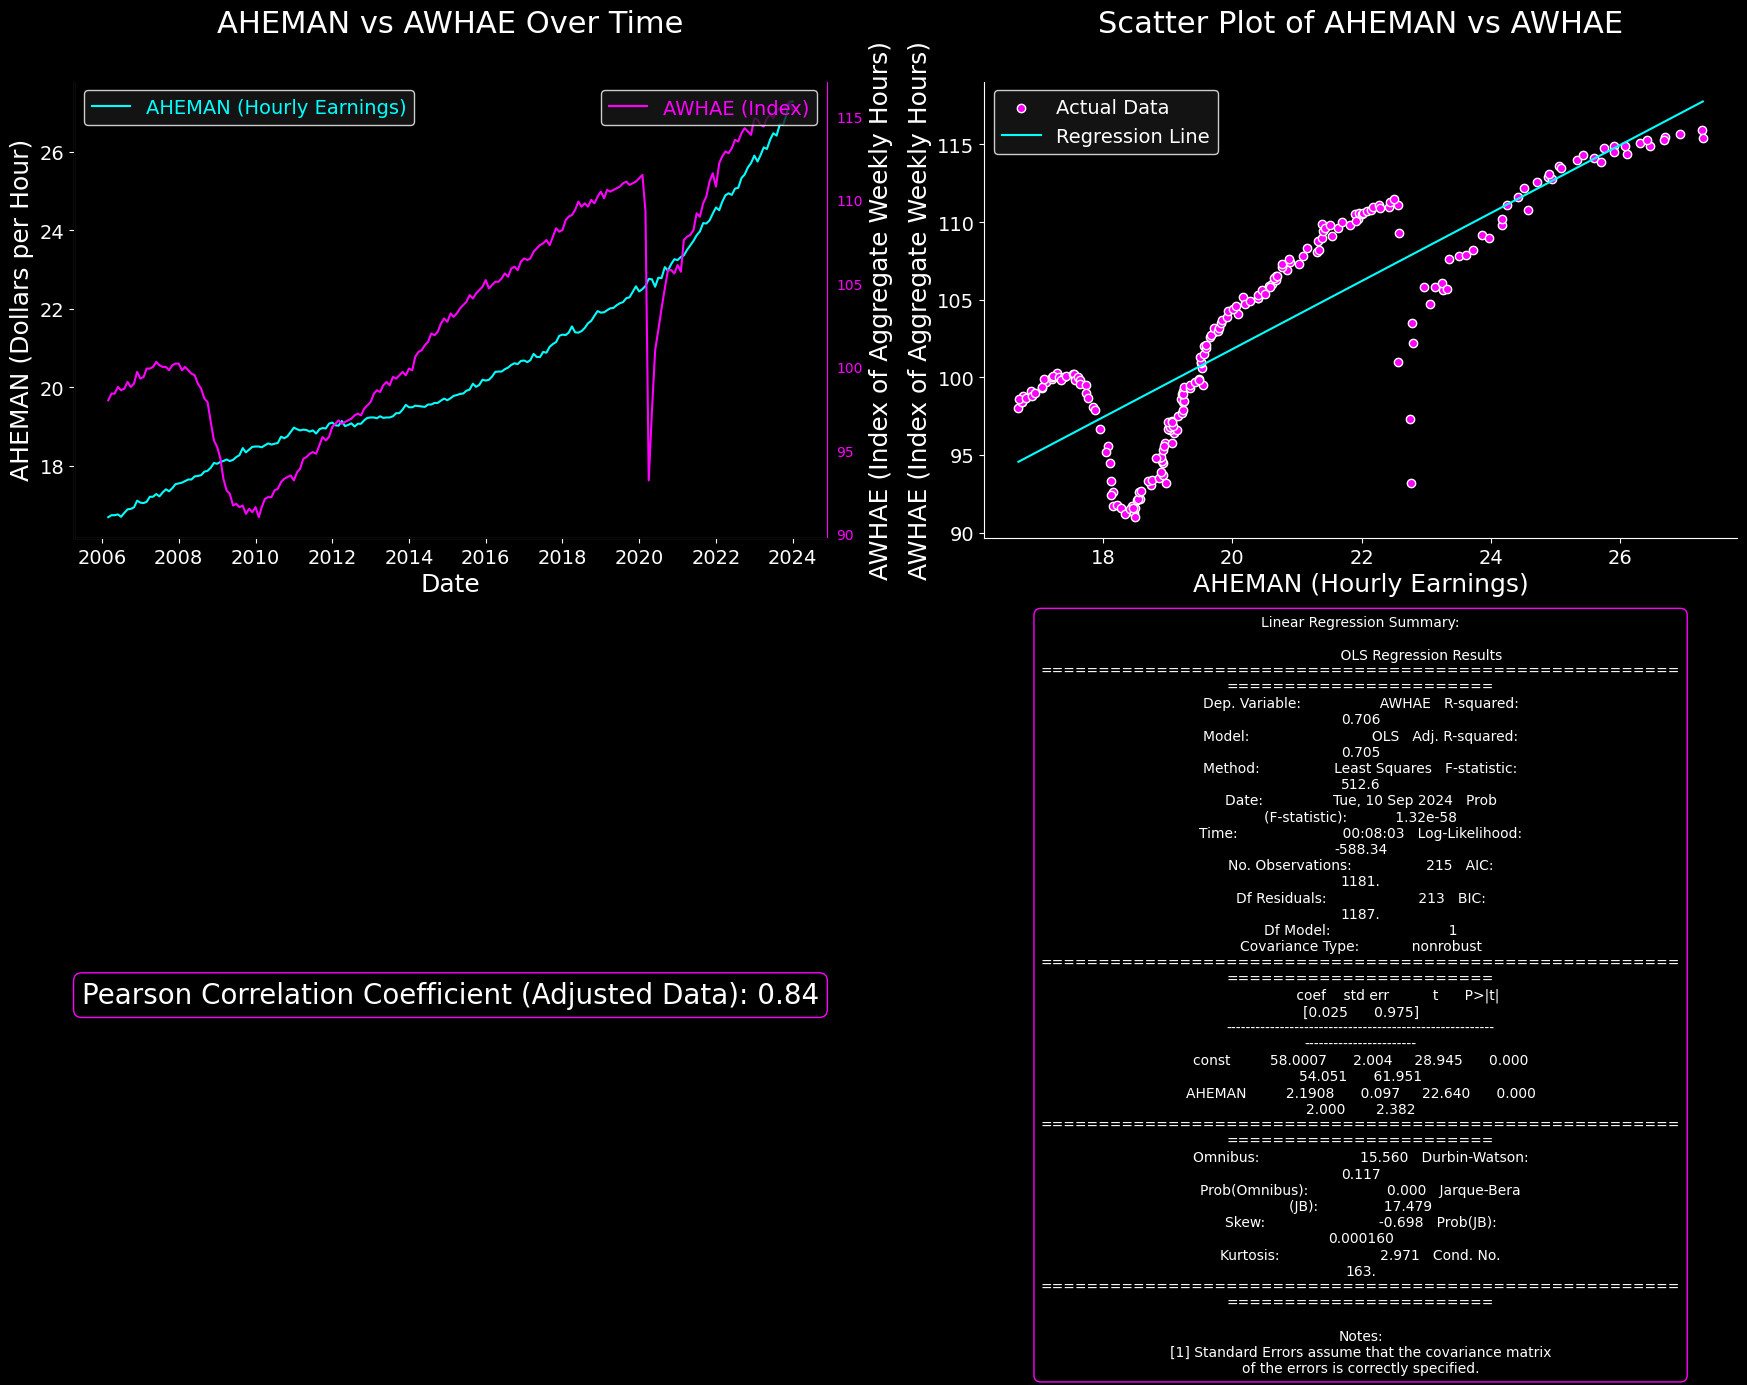

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import HTML
import textwrap

# Generate predictions from the regression model
y_pred = model.predict(X)

# Create a figure and axes for the dashboard
fig, axs = plt.subplots(2, 2, figsize=(18, 14), facecolor='#000000')
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot 1: Dual Y-Axis Line Graph - AHEMAN vs AWHAE (Index)
ax1 = axs[0, 0]
ax1.plot(merged_data.index, merged_data['AHEMAN'], color='#00FFFF', label='AHEMAN (Hourly Earnings)', zorder=3)
ax1.set_xlabel('Date', fontsize=18, color='white')
ax1.set_ylabel('AHEMAN (Dollars per Hour)', fontsize=18, color='white')
ax1.tick_params(axis='both', labelsize=14, colors='white')
ax1.set_facecolor('#000000')
ax1.spines['left'].set_color('white')
ax1.spines['bottom'].set_color('white')
ax1.set_title('AHEMAN vs AWHAE Over Time', fontsize=22, color='white', pad=35)

# Create a second y-axis for AWHAE
ax2 = ax1.twinx()
ax2.plot(merged_data.index, merged_data['AWHAE'], color='#FF00FF', label='AWHAE (Index)', zorder=3)
ax2.set_ylabel('AWHAE (Index of Aggregate Weekly Hours)', fontsize=18, color='white')
ax2.tick_params(axis='y', labelcolor='#FF00FF')
ax2.spines['right'].set_color('#FF00FF')

# Legends for both axes
ax1.legend(loc='upper left', fontsize=14, facecolor='#181818', edgecolor='white', labelcolor='#00FFFF')
ax2.legend(loc='upper right', fontsize=14, facecolor='#181818', edgecolor='white', labelcolor='#FF00FF')

# Plot 2: Scatter Plot with Regression Line
axs[0, 1].scatter(merged_data['AHEMAN'], merged_data['AWHAE'], color='#FF00FF', label='Actual Data', edgecolor='white')
axs[0, 1].plot(merged_data['AHEMAN'], y_pred, color='#00FFFF', label='Regression Line', zorder=4)
axs[0, 1].set_facecolor('#000000')
axs[0, 1].set_xlabel('AHEMAN (Hourly Earnings)', fontsize=18, color='white')
axs[0, 1].set_ylabel('AWHAE (Index of Aggregate Weekly Hours)', fontsize=18, color='white')
axs[0, 1].tick_params(axis='both', labelsize=14, colors='white')
axs[0, 1].spines['left'].set_color('white')
axs[0, 1].spines['bottom'].set_color('white')
axs[0, 1].set_title('Scatter Plot of AHEMAN vs AWHAE', fontsize=22, color='white', pad=35)
axs[0, 1].legend(loc='upper left', fontsize=14, facecolor='#181818', edgecolor='white', labelcolor='white')

# Plot 3: Pearson Correlation Coefficient (Cyberpunk Theme)
correlation = merged_data['AHEMAN'].corr(merged_data['AWHAE'])
axs[1, 0].text(0.5, 0.5, f'Pearson Correlation Coefficient (Adjusted Data): {correlation:.2f}',
               transform=axs[1, 0].transAxes, fontsize=20, verticalalignment='center',
               horizontalalignment='center', bbox=dict(boxstyle='round', facecolor='#000000',
               edgecolor='#FF00FF'), color='white')  # Font is white, outline is cyberpunk pink
axs[1, 0].axis('off')

# Plot 4: Linear Regression Summary (Text wrapping and resizing for better fit)
summary_text = model.summary().as_text()

# Wrapping the OLS summary for smaller width
wrapped_summary = "\n".join(textwrap.fill(line, width=55) for line in summary_text.splitlines())  # Adjust width to fit

axs[1, 1].text(0.5, 0.5, f'Linear Regression Summary:\n\n{wrapped_summary}',
               transform=axs[1, 1].transAxes, fontsize=10, color='white',
               horizontalalignment='center', verticalalignment='center',
               bbox=dict(facecolor='#000000', edgecolor='#FF00FF', boxstyle='round,pad=0.5'))
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the complete dashboard
plt.show()